# Titanic data analysis and wragling
Titanic data analysis main Purpose of this analysis is to figure out who was survived and is there any corelation or causation between survival and non survival

Important Question and its answers 

1) Is there any reason behind survial and dead person variant ratio as male:female?

2) Why adult male died more then female and children?

3) Is there any corelation between Pclass and survival?

4) Age,Sex and Pclass multidimentional Analysis give any new insight?

5) Is there any statistical analysis to improve survival ratio?

In [17]:
#Import libraby to analyse data
import pandas as pd 
import numpy as np
import random as rnd
import seaborn as sns


#data visualization
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline


Train data set used for analysis from Titanic dataset of Train, Test and Gender data sets.
Loading data for analysis and wargling:::

In [18]:
# data load
train_dt = pd.read_csv('/Users/shruti/Documents/Data Analyst - Udasity/titanic data analysis/train.csv')

Display sample of data from 891 records of train data

In [19]:
display(train_dt.head(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Original train data set display to check data before start wrangling and analysis

In [20]:
train_dt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Wargling data to find NaN values in Age and replace it 
warngle data to replace any NaN value in age because as we can see Age NaN value reduce 
total count to 714 which is not right for our findings.

In [21]:
# Replace NaN Value in age with Median of age
train_dt['Age'].fillna(train_dt['Age'].median(), inplace=True)

NaN Age data replace with median(age) to get more close age guessing for NaN age data as compare to choose 0  or even Mean to replace NaN

Now we can see Age is not contain any NaN value and now we can analyse data 

In [22]:
#data description 
train_dt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


All over survival rate to understand all orver survival of passenger

In [23]:
display('overall survival rate: {:.2f}%'.format(train_dt['Survived'].mean()*100))

'overall survival rate: 38.38%'

Distribution of data as per gender in total data set of 891

In [24]:
print('Count of Passenger as per gender')
print(train_dt.Sex.value_counts(dropna=False)).to_frame()

Count of Passenger as per gender
        Sex
male    577
female  314


1) Is there any reason behind survial and dead person variant ratio as male:female?

[<matplotlib.text.Text at 0x11610c750>, <matplotlib.text.Text at 0x1161143d0>]

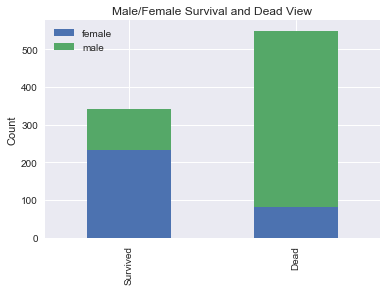

In [25]:
# Survival ratio based on gender 
survived_sex = train_dt[train_dt['Survived']==1]['Sex'].value_counts()
dead_sex = train_dt[train_dt['Survived']==0]['Sex'].value_counts()
train_df = pd.DataFrame([survived_sex,dead_sex])
train_df.index = ['Survived','Dead']
ax = train_df.plot(kind='bar', stacked = True)
ax.set(title='Male/Female Survival and Dead View', ylabel='Count')


Male dead more as compare to female so let try to analyse any reason on this variant ratio of survival 
Also Male 577 but not survived even 100 as compare to total female 314 survived around250 
social ethics to save female before male

2) Why adult male died more then female and children?

lets group age and gender to do more multidimentional analysis of data 

In [26]:
#function to use group by Age and sex and age distribution 
def human_type(passenger):
    age, sex = passenger

    if age <16:
        return 'child'
    else:
        return sex
    
train_dt['person'] = train_dt[['Age', 'Sex']].apply(human_type, axis =1)

Survival ratio of Male female and child as per age and gender group by analysis 

[<matplotlib.text.Text at 0x116253c90>, <matplotlib.text.Text at 0x1161f83d0>]

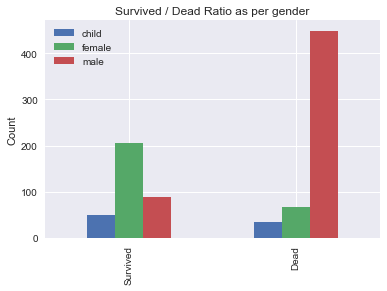

In [27]:
survived_sex = train_dt[train_dt['Survived']==1]['person'].value_counts()
dead_sex = train_dt[train_dt['Survived']==0]['person'].value_counts()
train_df = pd.DataFrame([survived_sex,dead_sex])
train_df.index = ['Survived','Dead']
ax = train_df.plot(kind='bar')
ax.set(title='Survived / Dead Ratio as per gender', ylabel='Count')

As male might try to rescue female, child 1st then male and might be they not able to survive themself during rescue of female and child

3) Is there any corelation between Pclass and survival?

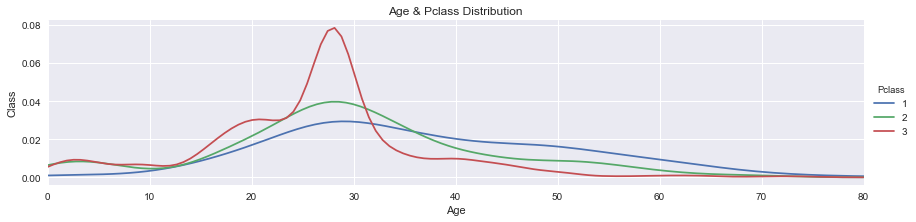

In [28]:
# Passenger Age and Pclass distribution of passenger in different visualization
new_fig = sns.FacetGrid(train_dt,hue='Pclass',aspect=4)
new_fig.map(sns.kdeplot,'Age')
oldest = train_dt['Age'].max()
new_fig.set(xlim=(0,oldest), ylabel='Class', title='Age & Pclass Distribution')
new_fig.add_legend()

From  above grid in class 3 there were max adult male as compare to other classes

4) Age,Sex and Pclass multidimentional Analysis give any new insight?

All over Passenger class wise survival analysis
Survival as per class and Sex & age ratio analysis

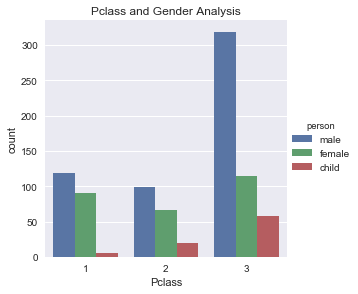

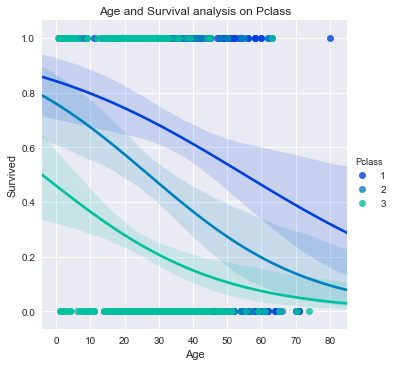

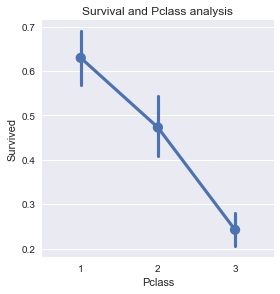

In [29]:
sns.factorplot('Pclass', data=train_dt,kind='count', hue='person')
plt.title('Pclass and Gender Analysis')
sns.lmplot('Age','Survived', hue='Pclass', data=train_dt, palette='winter', hue_order=range(1,4), logistic=True)
plt.title('Age and Survival analysis on Pclass')
sns.factorplot('Pclass','Survived',data=train_dt)
plt.title('Survival and Pclass analysis')

1) As per class, Age and Sex, survival very less in class 3 as compare to other classes where we can see more male adult were in class 3 as compare to other classes so now because of Pclass at the time of accident people gone be in diffenrent places and from class 3 area it gone be hard to reach to survival place.

2) While quantity is also variant in class 3 so survival ratio gone be different

3) from this analysis we can not come to any conclusion like due to which reason survival is that much less in class 3

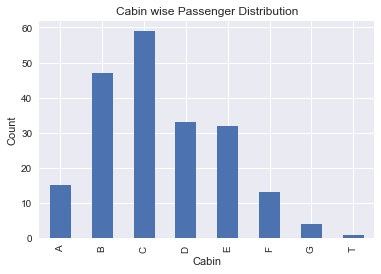

In [30]:
# cabin data wrangle as NaN data need taken care for cabin wise analysis 
cabin_deck = train_dt['Cabin'].dropna().apply(lambda x: x[0]).to_frame()
ax = cabin_deck.groupby('Cabin').size().plot.bar()
plt.title('Cabin wise Passenger Distribution')
ax.set(ylabel = 'Count')


Fare wise distribution is also clarify that class 3 is cheaper fare and survival is less in class 3 which clarify that cheaper class passenger less survived as compare to other which might be because of priority to 1st and 2nd class before 3rd class passenger.

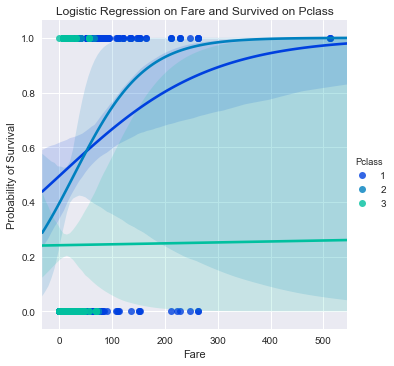

In [31]:
#Logistic Regression analysis
ax = sns.lmplot('Fare','Survived', hue='Pclass', data=train_dt, palette='winter', hue_order=range(1,4), logistic=True)
ax.set(title ='Logistic Regression on Fare and Survived on Pclass', ylabel='Probability of Survival')

Above Fare & survival analysis as on class distribution clarify that class 3 passenger paid less Fare and their survival was less too and reason behind this could be any 
of above like because if priority or quantity of total passengers or ethical values.

Conclusion:

survival of passenger as per class and Sex & age analysis and above visualization its clarify that More adult male died because they try to rescue more female and child 1st then male adult and during this male adult died. 
Male adult was more in class 3 so class 1 and class2 passenger rescued 1st as compare to 3rd class passenger might be as per fare priority taken into consideration.

If as per class passenger physically in where exact place and how long it will take for them to reach to rescue place is also important and we do not have detail about class wise passender exact place at the time of accident.
Also quantity of passenger was higher in class 3 so to rescue them all took longer as well by the time people died more. 

As still we have limitations on data like where class 3 people in ship at the time of accident and how long it will took them to reach to rescue place, or was there a short of rescue equipment available where class 3 passenger reach from which we can analyse and precisely conclude more accurate reason behind less survival of male adult/class 3 passengers what could be done that time to save more people.

From this analysis we come to  conclusion like due to listed above reason survival was that much less in class 3 as compare to other classes and why adult male died more than child and female. 
we can consider as social ethics people try to rescue female and child and old people before male adult during titanic accident. 

In Future:
To work more on this data and get more depth of analysis we can still work and analyse corelation of family data and survival corelation with class. 
Also we can do more logistic reggresion,Gradient Boosted trees to improve more analysis and visualization. 